In [30]:
import pandas as pd  # Importing pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset
from sklearn.metrics import r2_score  # Importing r2_score to evaluate the model
from sklearn.metrics import mean_absolute_error  # Importing mean_absolute_error to evaluate the model
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier for the model

In [32]:
# Load the Titanic dataset from a CSV file
survival= pd.read_csv('C:/Users/Admin/Downloads/ENCRYPTIX/TITANIC SURVIVAL PREDICTION/Titanic-Dataset.csv')
# Check the shape (number of rows and columns) of the dataframe
survival.shape

(891, 12)

In [33]:
# Display the first few rows of the dataframe
survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Display the last few rows of the dataframe
survival.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
# Generate descriptive statistics of the dataframe
survival.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# Check for duplicate rows in the dataframe
survival.duplicated().sum()

0

In [37]:
# Count the number of survivors
Survived = survival['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


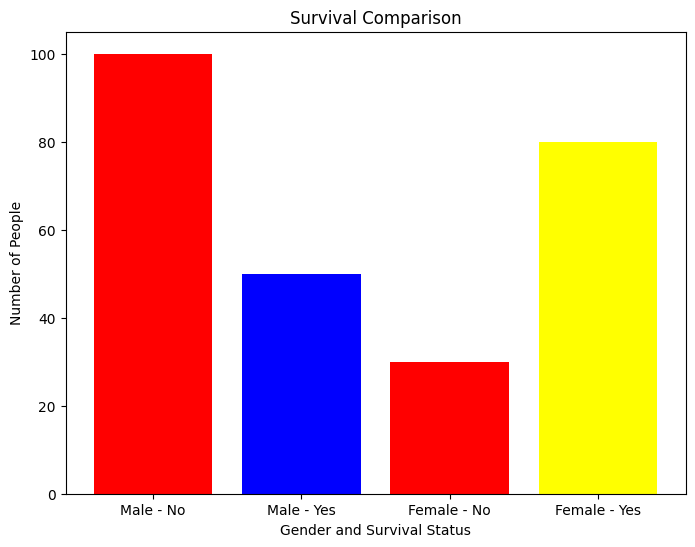

In [11]:
# Prepare data for survival comparison plot
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [100, 50, 30, 80]}  # replace with actual counts
Survived = pd.DataFrame(data)

# Create a bar plot for survival comparison
plt.figure(figsize=(8, 6)) # Set the size of the figure
plt.bar(Survived['Survived'], Survived['Counts'],color=["red","blue","red","yellow"]) # Create a bar plot
plt.xticks(Survived['Survived']) # Set the x-ticks to show survival categories
plt.title('Survival Comparison') # Set the title of the plot
plt.xlabel('Gender and Survival Status') # Set the x-axis label
plt.ylabel('Number of People')  # Set the y-axis label
plt.show() # Display the plot

In [38]:
# Drop irrelevant columns from the dataframe
survival.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True) 
survival.head() # Display the first few rows of the modified dataframe


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [39]:
# Separate inputs (features) and target variable
inputs = survival.drop('Survived',axis='columns') # Drop 'Survived' column from inputs
target = survival['Survived']  # Set 'Survived' as the target variable

# Convert categorical 'Sex' column into dummy/indicator variables
sex=pd.get_dummies(inputs.Sex) # Create dummy variables for 'Sex' column
sex.head() # Display the first few rows of the dummy variables

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [14]:
# Concatenate the dummy variables to the inputs dataframe
inputs=pd.concat([inputs,sex],axis="columns") 
inputs.head() # Display the first few rows of the updated inputs dataframe

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [15]:
# Drop the original 'Sex' column as it's now redundant
inputs.drop(["Sex"],axis="columns",inplace=True)
inputs.head() # Display the first few rows after dropping the 'Sex' column

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [16]:
# Check for missing values in the dataframe
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [17]:
# Fill missing values in 'Age' column with the mean value
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()  # Display the first few rows after filling missing values

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [18]:
# Display dataframe information
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.7 KB


In [19]:
# Check for missing values again
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

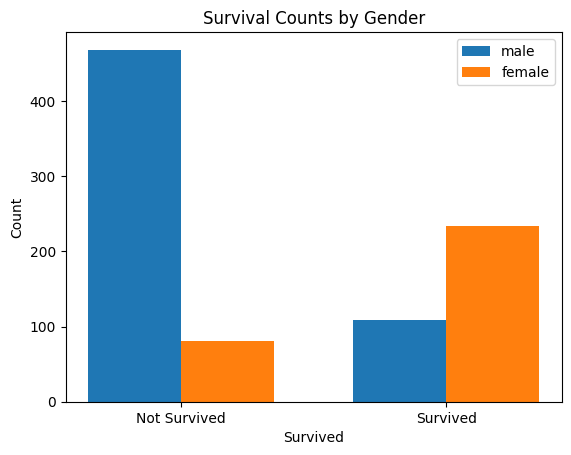

In [42]:
# Count survival by gender
counts = survival.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Define the bar width
bar_width = 0.35
index = counts.index  # Get the index of the counts dataframe

# Plotting
fig, ax = plt.subplots() # Create a subplot

# Plot bars for each Sex
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male') # Plot bars for males
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female') # Plot bars for females
ax.set_xlabel('Survived') # Set the x-axis label
ax.set_ylabel('Count') # Set the y-axis label
ax.set_title('Survival Counts by Gender') # Set the title of the plot
ax.set_xticks(index) # Set x-ticks
ax.set_xticklabels(['Not Survived', 'Survived'])  # Set x-tick labels
ax.legend()  # Add a legend

# Display the plot
plt.show()

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)
# Display training features
X_train

,Pclass,Age,Fare,female,male
633,1,29.699118,0.0000,False,True
804,3,27.000000,6.9750,False,True
858,3,24.000000,19.2583,True,False
464,3,29.699118,8.0500,False,True
357,2,38.000000,13.0000,True,False
...,...,...,...,...,...
66,2,29.000000,10.5000,True,False
347,3,29.699118,16.1000,True,False
764,3,16.000000,7.7750,False,True
776,3,29.699118,7.7500,False,True


In [22]:
# Display testing feature
X_test

,Pclass,Age,Fare,female,male
204,3,18.0,8.0500,False,True
638,3,41.0,39.6875,True,False
603,3,44.0,8.0500,False,True
668,3,43.0,8.0500,False,True
616,3,34.0,14.4000,False,True
...,...,...,...,...,...
436,3,21.0,34.3750,True,False
281,3,28.0,7.8542,False,True
559,3,36.0,17.4000,True,False
293,3,24.0,8.8500,True,False


In [23]:
# Display training target
y_train

633    0
804    1
858    1
464    0
357    0
      ..
66     1
347    1
764    0
776    0
619    0
Name: Survived, Length: 712, dtype: int64

In [24]:
# Display testing target
y_test

204    1
638    0
603    0
668    0
616    0
      ..
436    0
281    0
559    1
293    0
262    0
Name: Survived, Length: 179, dtype: int64

In [25]:
# Check the correlation matrix
inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


<Axes: >

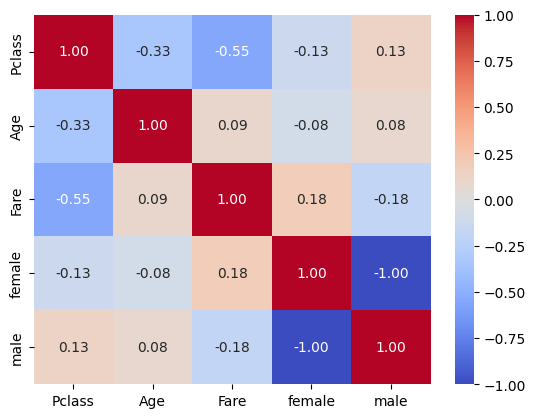

In [26]:
# Plot the heatmap of the correlation matrix
import seaborn as sns # Import seaborn for heatmap plotting
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Create a heatmap with annotations

In [27]:
# Create and train the RandomForest model
model=RandomForestClassifier() # Initialize the model
model.fit(X_train,y_train) # Fit the model with training data

RandomForestClassifier()

In [28]:
# Check the accuracy score of the model on test data
model.score(X_test,y_test) 

0.8268156424581006

In [29]:
# Predict the outcomes on the test data
predict=model.predict(X_test)

# Calculate the R^2 score for the model predictions
matrices=r2_score(predict,y_test)
matrices

0.20204199022145541